In [30]:
import pandas as pd
import numpy as np

#出力を小数点以下３桁に抑える。
%precision 3
#dataframeの出力を小数点以下３桁に抑える。
pd.set_option('precision' , 3)
!pip install japanize-matplotlib
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEuPq7vB1vrhEE1e9ZAWRWJCgqGfUGgzsjVlWqU0thJKQwt6J6qMDo
Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/My Drive/統計/Pokemon.csv")

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#データの大きさ
df.shape

(800, 13)

### 質的変数と量的変数

質的変数とは‥アンケートの満足度（よい・普通・悪い）や学校の成績（S・A・B・C）などの種類を区別するような変数のこと。名義尺度と順序尺度に分かれる。

・名義尺度…名義尺度は単に分類するための変数のこと。例えば生徒番号、名前、性別などがあげられる。大小関係がないみたいな感じです。

・順序尺度…順序関係や大小関係に意味のある変数。例えば学校の成績でAよりSのほうがいいといったもの。しかし、SとAの差とAとBの差を比較することはできない。

<br>
<br>

量的変数とは‥テストの点数や体重といった量を表現する変数のこと。間隔尺度と比例尺度に分かれる。

・間隔尺度…間隔尺度は大小関係に加え大小関係に意味のある変数。例えば温度50度と70度には20度もの差があるという数値的に意味があるもの。

・比例関係…大小関係・差・比すべてに意味がある変数のこと。長さで考えると100cmと50cmには大小関係・差・比に意味がある。


### 一次元データに関して
df

In [ ]:
#一次元データに変更している。
scores = df["HP"].values#numpyのarray構造に変換している。
#socres = np.array(df["HP"])#別解
scores[:10]

array([45, 60, 80, 80, 39, 58, 78, 78, 78, 44])

平均


In [ ]:
sum(scores) / len(scores)

69.259

In [ ]:
np.mean(scores)

69.259

In [ ]:
scores.mean()

69.259

In [ ]:
df["HP"].mean()

69.259

中央値
中央値は平均値に比べて外れ値に強い性質を持つ<br>
中央値は<br>
データ数ｎが奇数なら、（n+1）/2番目のデータが中央値<br>
データ数ｎが偶数なら、n/2番目のデータとn/2＋１番目のデータの平均が中央値

In [ ]:
#データを並べ替える
print(scores[:10])
print(np.sort(socres)[:10])
sorted_scores = np.sort(scores)

[45 60 80 80 39 58 78 78 78 44]
[ 1 10 20 20 20 20 20 20 25 25]


In [ ]:
def median(data):
  #インデックスが0から始まることに注意
  n = len(data)
  if n % 2 == 0:
    first = data[n//2]
    second = data[n//2 -1]
    return (first + second) / 2
  else:
    return data[(n+1)//2 - 1]

median(sorted_scores)

65.000

In [ ]:
np.median(scores)

65.000

In [ ]:
df["HP"].median()

65.000

最頻値<br>
もっとも多く出現する値のこと<br>
基本的に質的データの代表値を求めるときに使う指標です。<br>
しかしながら一意に定まらないときがあるため注意が必要

In [ ]:
df["Type 1"].mode()

0    Water
dtype: object

データのばらつき

偏差<br>
各データが平均からどれだけ離れているのかを表す

In [ ]:
mean = np.mean(scores)
deviation = scores - mean
deviation[:10]

array([-24.259,  -9.259,  10.741,  10.741, -30.259, -11.259,   8.741,
         8.741,   8.741, -25.259])

In [ ]:
#偏差の平均
np.mean(deviation)

-0.000

In [ ]:
score_df = pd.DataFrame()
score_df["HP"] = df["HP"].values
score_df["deviation"] = deviation
score_df.head() 

,HP,deviation
0,45,-24.259
1,60,-9.259
2,80,10.741
3,80,10.741
4,39,-30.259


In [ ]:
score_df.mean()

HP           6.926e+01
deviation    1.407e-14
dtype: float64

In [ ]:
score_df["deviation"].mean()

0.000

分散<br>
numpyは標本分散<br>
pandasは不偏分散

In [ ]:
np.mean(deviation ** 2)

651.204

In [ ]:
np.var(scores)

651.204

In [ ]:
df["HP"].var()#不偏分散

652.019

In [ ]:
df["HP"].var(ddof=0)#標本分散

651.204

In [ ]:
score_df["偏差2乗"] = np.square(deviation)

標準偏差


In [ ]:
np.sqrt(np.var(scores , ddof = 0))

25.519

In [ ]:
np.std(scores , ddof=0)#標本分散のルートをとったもの

25.519

範囲<br>
最大値と最小値との差<br>
範囲もばらつきを見る<br>
外れ値には弱い

In [ ]:
np.max(scores) - np.min(scores)

254

四分位範囲<br>
範囲は最大値と最小値との差を求めていたが、四分位範囲はデータの25%、50%、75%に位置する値に注目してみる。<br>
それぞれを第一四分位点、第二四分位点、第三四分位点といいQ1、Q2、Q3で表す。<br>
四分位範囲(IQR)はQ3－Q1と定義される　

In [ ]:
scores_Q1 = np.percentile(scores , 25)
scores_Q2 = np.percentile(scores , 50)#中央値
scores_Q3 = np.percentile(scores , 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

30.000

今までのまとめ

In [ ]:
df["HP"].describe()

count    800.000
mean      69.259
std       25.535
min        1.000
25%       50.000
50%       65.000
75%       80.000
max      255.000
Name: HP, dtype: float64

### 標準化
データから平均を引き標準偏差で割る操作を標準化という。

In [ ]:
z = (scores - np.mean(scores)) / np.std(scores)
z[:10]

array([-0.951, -0.363,  0.421,  0.421, -1.186, -0.441,  0.343,  0.343,
        0.343, -0.99 ])

In [ ]:
#標準化されたデータは平均0標準偏差１になる。
print(np.mean(z))
print(np.std(z))

-2.486899575160351e-16
1.0


偏差値…平均50標準偏差が10になるように正規化した値

In [ ]:
z = 50 +  10 * ((scores - np.mean(scores)) / np.std(scores))
z[:10]

array([40.494, 46.372, 54.209, 54.209, 38.143, 45.588, 53.425, 53.425,
       53.425, 40.102])

In [ ]:
score_df["偏差値"]  = z
score_df.head()

,HP,deviation,偏差2乗,偏差値
0,45,-24.259,588.487,40.494
1,60,-9.259,85.724,46.372
2,80,10.741,115.374,54.209
3,80,10.741,115.374,54.209
4,39,-30.259,915.592,38.143


度数分布表・ヒストグラム

In [ ]:
#bins 階級数 rangeで最小値と最大値の指定を行える
freq , _ = np.histogram(df["HP"].values , bins = 10 , range=(0 , 300))
freq

array([ 11, 261, 370, 131,  17,   7,   1,   0,   2,   0])

In [ ]:
#度数分布表の作成
freq_class = [f'{i}~{i+30}' for i in range(0 , 300 , 30)]
freq_df = pd.DataFrame({"度数":freq} , index=pd.Index(freq_class , name = "階級"))
freq_df

,度数
階級,
0~30,11
30~60,261
60~90,370
90~120,131
120~150,17
150~180,7
180~210,1
210~240,0
240~270,2


In [ ]:
#階級値
class_values = [(i + i + 30)//2 for i in range(0 , 300 , 30)]
class_values

[15, 45, 75, 105, 135, 165, 195, 225, 255, 285]

In [ ]:
#相対度数
rel_freq = freq / freq.sum()
rel_freq

array([0.014, 0.326, 0.463, 0.164, 0.021, 0.009, 0.001, 0.   , 0.003,
       0.   ])

In [ ]:
#累積相対度数
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.014, 0.34 , 0.802, 0.966, 0.988, 0.996, 0.998, 0.998, 1.   ,
       1.   ])

In [ ]:
freq_df["階級値"] = class_values
freq_df["相対度数"] = rel_freq
freq_df["累積相対度数"] = cum_rel_freq
freq_df

,度数,階級値,相対度数,累積相対度数
階級,,,,
0~30,11,15,0.014,0.014
30~60,261,45,0.326,0.340
60~90,370,75,0.463,0.802
90~120,131,105,0.164,0.966
120~150,17,135,0.021,0.988
150~180,7,165,0.009,0.996
180~210,1,195,0.001,0.998
210~240,0,225,0.000,0.998
240~270,2,255,0.003,1.000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text

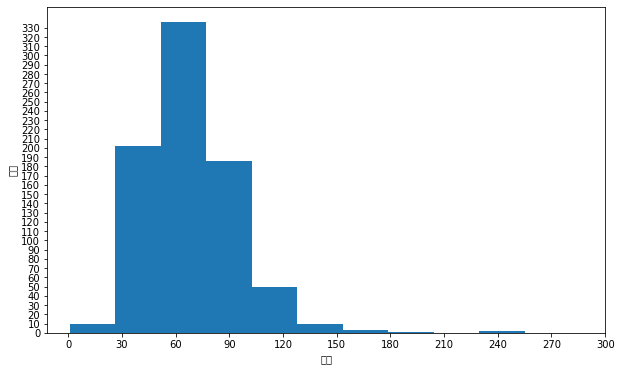

In [ ]:
#ヒストグラム作成
import matplotlib.pyplot as plt
%matplotlib inline
#キャンパスの作成
#縦と横の大きさを指定。
fig = plt.figure(figsize = (10 , 6))
#キャンパス上にグラフを描画するための領域を作成
#引数は領域を1*1こ作り、一つ目の領域に描画していることを意味している。
ax = fig.add_subplot(111)

freq , _ , _ = ax.hist(scores , bins = 10)
ax.set_xlabel('点数')
ax.set_ylabel("人数")
ax.set_xticks(np.linspace(0,300 , 10 + 1))#メモリをふる
ax.set_yticks(np.arange(0 , freq.max(), 10))
plt.show()

箱ひげ図


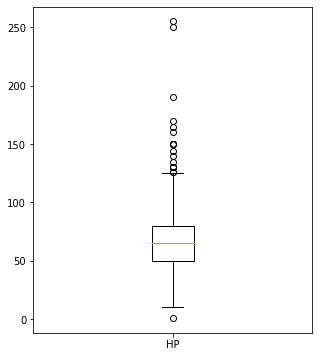

In [ ]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(scores , labels =["HP"])

plt.show()

### 二次元データに関して

In [7]:
df[["Attack","Defense"]].head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [32]:
attack =df["Attack"].values
defense = df["Defense"].values

In [9]:
score_df = df[["Attack","Defense"]]
score_df.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


共分散<br>
共分散が正であれば2変数の間で正の相関があり、負であれば2変数の間で負の相関がある。

In [14]:
score_df["attack偏差"] = attack -  np.mean(attack)
score_df["defense偏差"] = defense -  np.mean(defense)
score_df["偏差同士の積"] =  score_df["attack偏差"].values *  score_df["defense偏差"].values 
score_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Attack,Defense,attack偏差,defence偏差,偏差同士の積
0,49,49,-30.001,-24.843,745.306
1,62,63,-17.001,-10.843,184.336
2,82,83,2.999,9.157,27.461
3,100,123,20.999,49.157,1032.246
4,52,43,-27.001,-30.843,832.786


In [15]:
#共分散
score_df["偏差同士の積"].mean()

443.455

In [16]:
#分散共分散行列
cov_mat = np.cov(attack , defense , ddof = 0)
cov_mat

#1行１列目はattackの分散
#2行2列目はdefenceの分散
#残りの行は2つの共分散

array([[1052.164,  443.455],
       [ 443.455,  971.195]])

In [18]:
np.var(attack)

1052.164

相関係数<br>
相関係数は単位に依存しない相関を表す指。<br>
相関係数は共分散を各データの標準偏差で割ることで求めることができる。<br>
-1~1までの間の値をとり、1に近いほど正の相関があり、-1に近いほど負の相関がある。

In [20]:
#相関
np.cov(attack , defense , ddof = 0)[0,1]/(np.std(attack) * np.std(defense))
#今回は0.4ぐらいであるので正の相関はあるが強い正の相関があるわけではない。

0.439

In [21]:
#相関行列
np.corrcoef(attack , defense)


array([[1.   , 0.439],
       [0.439, 1.   ]])

In [23]:
#pandasの相関行列
df[["HP","Attack" , "Defense"]].corr()

,HP,Attack,Defense
HP,1.000,0.422,0.240
Attack,0.422,1.000,0.439
Defense,0.240,0.439,1.000


二次元データの可視化

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

散布図

Text(0, 0.5, '防御')

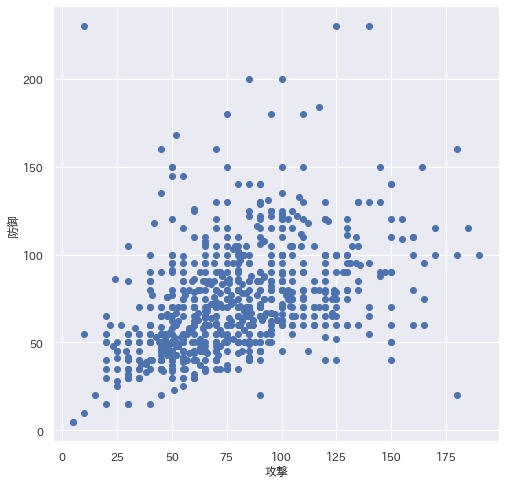

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(attack , defence)
ax.set_xlabel('攻撃')
ax.set_ylabel("防御")

回帰直線<br>
$y = b_0 + b_1x$

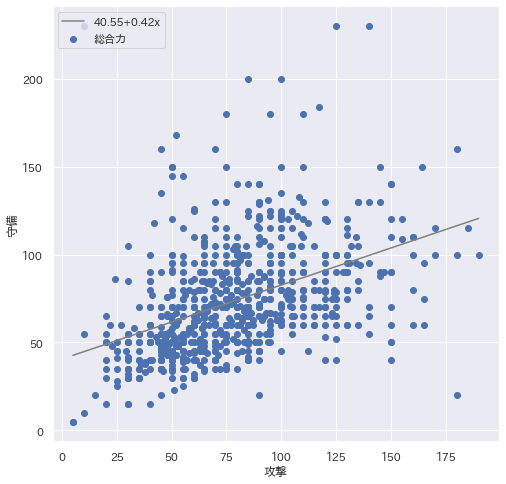

In [39]:
#b_0とb_1を求める
poly_fit = np.polyfit(attack , defense ,1 )#array([ 0.421, 40.546])
#y = b_0+b_1*xを返す関数を作成
poly_1d = np.poly1d(poly_fit)#poly1d([ 0.421, 40.546])
#直線を描画するためのx座標を作る
xs = np.linspace(attack.min() , attack.max())
#xsに対するy座標を求める
ys = poly_1d(xs)#回帰直線のy座標が入っている
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('攻撃')#xsで攻撃を基にx座標を作成しているため
ax.set_ylabel('守備')
ax.scatter(attack , defense , label = '総合力')
ax.plot(xs , ys , color='gray' , label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.legend(loc='upper left')
plt.show()

ヒートマップ

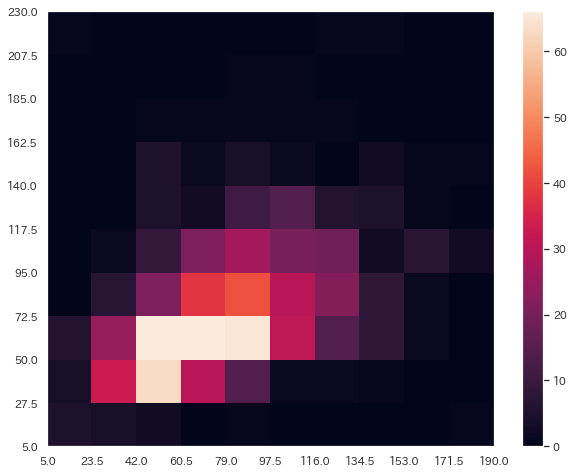

In [42]:
fig = plt.figure(figsize=(10 , 8))
ax = fig.add_subplot(111)

c = ax.hist2d(attack , defense)
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax = ax)
plt.show()